![Colegio Bourbaki](./Images/Bourbaki.png)

## Rudimentos de Machine Learning

### Clasificación Multiclase

### Librerías

In [1]:
# Data Analysis
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Classifiers
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Utils
from ast import literal_eval
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

### Funciones de ayuda

In [2]:
def plot_correlation_matrix(dataframe, plot_graph=True, return_matrix=False):
    """
    Calculates and optionally plots the correlation matrix of a given DataFrame.
    
    Parameters:
    - dataframe: DataFrame from which to calculate the correlation matrix.
    - plot_graph: If True, displays a heatmap of the correlation matrix.
    - return_matrix: If True, returns the correlation matrix.
    
    Returns:
    - If return_matrix is True, returns the correlation matrix of the dataframe.
    """
    # Calculate the correlation matrix
    correlation_matrix = dataframe.corr('spearman')
    
    # Plot the correlation matrix heatmap if requested
    if plot_graph:
        plt.figure(figsize=(40, 30))
        sns.heatmap(correlation_matrix, vmin=-1, vmax=1, center=0, cmap="hot", annot=True, fmt=".2f", square=False)
        plt.xticks(rotation=45, horizontalalignment='right')
    
    # Return the correlation matrix if requested
    if return_matrix:
        return correlation_matrix

In [3]:
def plot_confusion_matrix(y_true, y_pred, classes):
    """
    Plots a confusion matrix using Seaborn's heatmap.

    Parameters:
    - y_true: array-like of shape (n_samples,), True labels of the data.
    - y_pred: array-like of shape (n_samples,), Predicted labels.

    Returns:
    - None, displays a confusion matrix.
    """
    # Compute confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Create a DataFrame for Seaborn's heatmap
    class_labels = ["Assistant", "Director", "Executive", "Manager"]
    confusion_df = pd.DataFrame(confusion_mat, index=class_labels, columns=class_labels)

    # Plotting the heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_df, annot=True, fmt="g", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    plt.show()
    print(classes)
    print("Los valores de las etiquetas de validación y_val son: ")
    print(pd.DataFrame(y_true).value_counts().to_dict())
  

In [4]:
def high_correlation_features(dataframe, threshold=0.95):
    """
    Identifies and returns pairs of highly correlated features from the given dataframe.

    Parameters:
    - dataframe: A pandas DataFrame containing the dataset.
    - threshold: A float representing the correlation threshold to identify high correlations.

    Returns:
    - A DataFrame with pairs of features that have a correlation coefficient above the threshold.
    """
    # Calculate the correlation matrix
    corr_matrix = dataframe.corr()

    # Find features with a correlation above the threshold
    # Note: The matrix is symmetric, so we need to filter out one side to avoid duplicates
    high_corr_pairs = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                       .stack()
                       .reset_index())
    high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
    high_corr_pairs = high_corr_pairs.loc[abs(high_corr_pairs['Correlation']) > threshold, :]

    return high_corr_pairs

### Configuraciones

In [5]:
pd.set_option("display.max_colwidth", 100)

### Carga de Datos

In [6]:
# Load the datasets
X_train = pd.read_csv("./Data/X_train_hYV2vs5.csv")
y_train = pd.read_csv("./Data/y_train_Ga8ie3n.csv")

In [7]:
# Display the first few rows of each dataset to understand their structure
X_train.head()

,Unnamed: 0,id,employee embedding,company embedding
0,0,0,"[0.0132625512778759, -0.37616726756095886, -0.6138273477554321, 0.3597288429737091, 0.1938832253...","[0.39761704206466675, 0.011816106736660004, 0.18756330013275146, 0.28075793385505676, -0.3438225..."
1,1,1,"[-0.2827381491661072, -0.012908441945910454, 0.20536786317825317, 0.4824570119380951, 0.28561165...","[0.31051310896873474, -0.33802372217178345, 0.023328864946961403, 0.6985604166984558, 0.55193680..."
2,2,2,"[0.3999897241592407, -0.2984728515148163, -0.21097324788570404, -0.032957494258880615, 0.0576869...","[0.1970466524362564, 0.062399972230196, 0.2565808594226837, 0.2552056312561035, -0.3004423379898..."
3,3,3,"[0.3999897241592407, -0.2984728515148163, -0.21097324788570404, -0.032957494258880615, 0.0576869...","[0.6501612067222595, -0.17757245898246765, 0.14481377601623535, 0.24889503419399261, 0.105174317..."
4,4,4,"[0.010124210268259048, 0.05761045217514038, -0.12174289673566818, 0.05773239582777023, 0.0840810...","[0.5966811180114746, -0.06162050738930702, 0.05697030574083328, 0.38894954323768616, -0.10050294..."


In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29273 entries, 0 to 29272
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          29273 non-null  int64 
 1   id                  29273 non-null  int64 
 2   employee embedding  29273 non-null  object
 3   company embedding   29273 non-null  object
dtypes: int64(2), object(2)
memory usage: 914.9+ KB


In [9]:
y_train.head()

,Unnamed: 0,id,position
0,0,0,Executive
1,1,1,Executive
2,2,2,Executive
3,3,3,Executive
4,4,4,Executive


In [10]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29273 entries, 0 to 29272
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  29273 non-null  int64 
 1   id          29273 non-null  int64 
 2   position    29273 non-null  object
dtypes: int64(2), object(1)
memory usage: 686.2+ KB


### Análisis Exploratorio

Observemos como se presentan los encajes de los empleados y las empresas.

In [11]:
X_train["employee embedding"][0]

'[0.0132625512778759, -0.37616726756095886, -0.6138273477554321, 0.3597288429737091, 0.19388322532176971, 0.388049840927124, -0.0019527515396475792, -0.019566569477319717, 0.16178344190120697, 0.07337291538715363, -0.653967559337616, 0.4436742663383484, 0.8654799461364746, -0.4936961233615875, 0.6502818465232849, -0.6351300477981567, -0.5592029690742493, -0.7620808482170105, 0.9692695736885071, -0.4774521589279175, -0.41634371876716614, 0.8325812816619873, 0.43767035007476807, 0.08167269825935364, 0.626442551612854, 0.4704917371273041, -0.22233393788337708, 0.6111934185028076, -0.8858100175857544, -0.19638687372207642, -0.4154769778251648, -0.8892935514450073]'

Estan definidos como 'strings', aunque sin embargo dentro del string esta el encaje vectorial:

In [12]:
len(X_train["employee embedding"][0])

667

La longitud calculada arriba no es la dimension del embedding, es la cantidad de caracteres que hay dentro del 'string'. Por lo tanto necesitamos convertir esto a lista.

Veamos la distribución de las etiquetas:

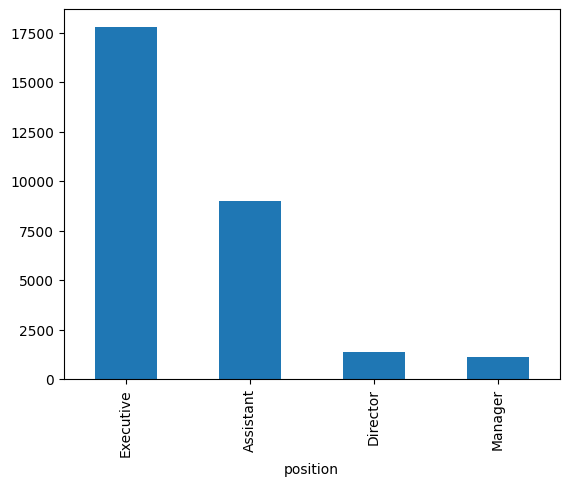

In [13]:
y_train["position"].value_counts().plot(kind="bar")
plt.show()

Como vemos es un dataset multiclase desbalanceado.

### Preprocesamiento

Vamos a quitar las columnas innecesarias.

In [14]:
# Drop the unnamed columns
X_train.drop(columns=["Unnamed: 0"], inplace=True)
y_train.drop(columns=["Unnamed: 0"], inplace=True)

Convertiremos el 'string' a lista con la función literal_eval de la librería ast (https://docs.python.org/3/library/ast.html)

El módulo ast ayuda a las aplicaciones Python a procesar árboles de la gramática de la sintaxis abstracta de Python. La propia sintaxis abstracta puede cambiar con cada versión de Python; este módulo ayuda a averiguar mediante programación cómo es la gramática actual.

In [15]:
# Convert string representations of the embeddings to actual lists
X_train["employee embedding"] = X_train["employee embedding"].apply(literal_eval)
X_train["company embedding"] = X_train["company embedding"].apply(literal_eval)

Ahora podemos calcular qué dimensión tienen los encajes:

In [16]:
print(
    f"El número de características de los empleados es: {len(X_train['employee embedding'][0])}"
)
print(
    f"El número de características de las empresas es: {len(X_train['company embedding'][0])}"
)

El número de características de los empleados es: 32
El número de características de las empresas es: 32


In [17]:
X_train.head()

,id,employee embedding,company embedding
0,0,"[0.0132625512778759, -0.37616726756095886, -0.6138273477554321, 0.3597288429737091, 0.1938832253...","[0.39761704206466675, 0.011816106736660004, 0.18756330013275146, 0.28075793385505676, -0.3438225..."
1,1,"[-0.2827381491661072, -0.012908441945910454, 0.20536786317825317, 0.4824570119380951, 0.28561165...","[0.31051310896873474, -0.33802372217178345, 0.023328864946961403, 0.6985604166984558, 0.55193680..."
2,2,"[0.3999897241592407, -0.2984728515148163, -0.21097324788570404, -0.032957494258880615, 0.0576869...","[0.1970466524362564, 0.062399972230196, 0.2565808594226837, 0.2552056312561035, -0.3004423379898..."
3,3,"[0.3999897241592407, -0.2984728515148163, -0.21097324788570404, -0.032957494258880615, 0.0576869...","[0.6501612067222595, -0.17757245898246765, 0.14481377601623535, 0.24889503419399261, 0.105174317..."
4,4,"[0.010124210268259048, 0.05761045217514038, -0.12174289673566818, 0.05773239582777023, 0.0840810...","[0.5966811180114746, -0.06162050738930702, 0.05697030574083328, 0.38894954323768616, -0.10050294..."


Los encajes fueron realizados por BERT, por lo tanto, no tenemos acceso a la información original. Entonces, lo que podemos hacer es tomar cada elemento del encaje como una variable latente (latent feature) y crear una nueva columna para cada uno de estos encajes.

In [18]:
# Expand each embedding into its own set of columns
employee_embeddings_expanded = X_train["employee embedding"].apply(pd.Series)
company_embeddings_expanded = X_train["company embedding"].apply(pd.Series)
ids = X_train["id"]

In [19]:
# You can add a prefix to column names to distinguish between them
employee_embeddings_expanded = employee_embeddings_expanded.add_prefix("employee_")
company_embeddings_expanded = company_embeddings_expanded.add_prefix("company_")

In [20]:
# Concatenate the expanded embeddings side-by-side
expanded_data = pd.concat([
    ids, employee_embeddings_expanded, company_embeddings_expanded], axis=1
)

In [21]:
expanded_data

,id,employee_0,employee_1,employee_2,employee_3,employee_4,employee_5,employee_6,employee_7,employee_8,...,company_22,company_23,company_24,company_25,company_26,company_27,company_28,company_29,company_30,company_31
0,0,0.013263,-0.376167,-0.613827,0.359729,0.193883,0.388050,-0.001953,-0.019567,0.161783,...,0.496415,-0.295326,0.294123,0.566333,-0.450409,0.667816,-0.907596,-0.421868,-0.320554,-0.404289
1,1,-0.282738,-0.012908,0.205368,0.482457,0.285612,-0.261424,0.602928,-0.176004,0.351918,...,0.534470,-0.209862,0.664622,0.539178,-0.367445,0.639607,-0.869631,-0.154816,0.075938,-0.639021
2,2,0.399990,-0.298473,-0.210973,-0.032957,0.057687,0.421141,0.949937,-0.365188,0.327099,...,0.125662,0.140065,0.080729,0.233294,-0.238041,0.564176,-0.930845,-0.559797,0.103106,-0.149208
3,3,0.399990,-0.298473,-0.210973,-0.032957,0.057687,0.421141,0.949937,-0.365188,0.327099,...,0.413645,-0.109720,0.322721,0.508323,-0.369104,0.496631,-0.881074,-0.056100,0.556903,-0.202640
4,4,0.010124,0.057610,-0.121743,0.057732,0.084081,-0.044404,0.155736,-0.125136,0.237426,...,0.416849,0.408343,0.337121,0.392495,-0.265649,0.664976,-0.922024,-0.505522,-0.364163,-0.073651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29268,29268,-0.250504,-0.206762,0.560853,0.620775,0.059061,0.600513,0.842257,-0.081184,-0.012164,...,0.625244,-0.479323,-0.614838,0.481588,-0.346560,-0.026151,-0.916651,-0.543107,-0.048471,-0.492233
29269,29269,-0.250504,-0.206762,0.560853,0.620775,0.059061,0.600513,0.842257,-0.081184,-0.012164,...,0.668651,-0.014901,0.125109,0.722615,-0.437460,0.494184,-0.949057,-0.463338,-0.481801,-0.360249
29270,29270,-0.250504,-0.206762,0.560853,0.620775,0.059061,0.600513,0.842257,-0.081184,-0.012164,...,0.520000,-0.045959,-0.213980,0.378754,-0.100366,0.681874,-0.956545,-0.178433,-0.328740,-0.499143
29271,29271,-0.250504,-0.206762,0.560853,0.620775,0.059061,0.600513,0.842257,-0.081184,-0.012164,...,0.245802,0.419488,0.199170,0.412047,-0.004225,0.181359,-0.867206,-0.811884,0.004347,0.283375


Concatenamos las columnas de encajes con las columnas de identificación.

In [22]:
data = pd.merge(expanded_data, y_train, on="id")

In [23]:
data.set_index("id", inplace=True)

In [24]:
data.head()

,employee_0,employee_1,employee_2,employee_3,employee_4,employee_5,employee_6,employee_7,employee_8,employee_9,...,company_23,company_24,company_25,company_26,company_27,company_28,company_29,company_30,company_31,position
id,,,,,,,,,,,,,,,,,,,,,
0,0.013263,-0.376167,-0.613827,0.359729,0.193883,0.388050,-0.001953,-0.019567,0.161783,0.073373,...,-0.295326,0.294123,0.566333,-0.450409,0.667816,-0.907596,-0.421868,-0.320554,-0.404289,Executive
1,-0.282738,-0.012908,0.205368,0.482457,0.285612,-0.261424,0.602928,-0.176004,0.351918,-0.483896,...,-0.209862,0.664622,0.539178,-0.367445,0.639607,-0.869631,-0.154816,0.075938,-0.639021,Executive
2,0.399990,-0.298473,-0.210973,-0.032957,0.057687,0.421141,0.949937,-0.365188,0.327099,0.015427,...,0.140065,0.080729,0.233294,-0.238041,0.564176,-0.930845,-0.559797,0.103106,-0.149208,Executive
3,0.399990,-0.298473,-0.210973,-0.032957,0.057687,0.421141,0.949937,-0.365188,0.327099,0.015427,...,-0.109720,0.322721,0.508323,-0.369104,0.496631,-0.881074,-0.056100,0.556903,-0.202640,Executive
4,0.010124,0.057610,-0.121743,0.057732,0.084081,-0.044404,0.155736,-0.125136,0.237426,-0.125507,...,0.408343,0.337121,0.392495,-0.265649,0.664976,-0.922024,-0.505522,-0.364163,-0.073651,Executive


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29273 entries, 0 to 29272
Data columns (total 65 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   employee_0   29273 non-null  float64
 1   employee_1   29273 non-null  float64
 2   employee_2   29273 non-null  float64
 3   employee_3   29273 non-null  float64
 4   employee_4   29273 non-null  float64
 5   employee_5   29273 non-null  float64
 6   employee_6   29273 non-null  float64
 7   employee_7   29273 non-null  float64
 8   employee_8   29273 non-null  float64
 9   employee_9   29273 non-null  float64
 10  employee_10  29273 non-null  float64
 11  employee_11  29273 non-null  float64
 12  employee_12  29273 non-null  float64
 13  employee_13  29273 non-null  float64
 14  employee_14  29273 non-null  float64
 15  employee_15  29273 non-null  float64
 16  employee_16  29273 non-null  float64
 17  employee_17  29273 non-null  float64
 18  employee_18  29273 non-null  float64
 19  employee_

Veamos la correlación entre las columnas:

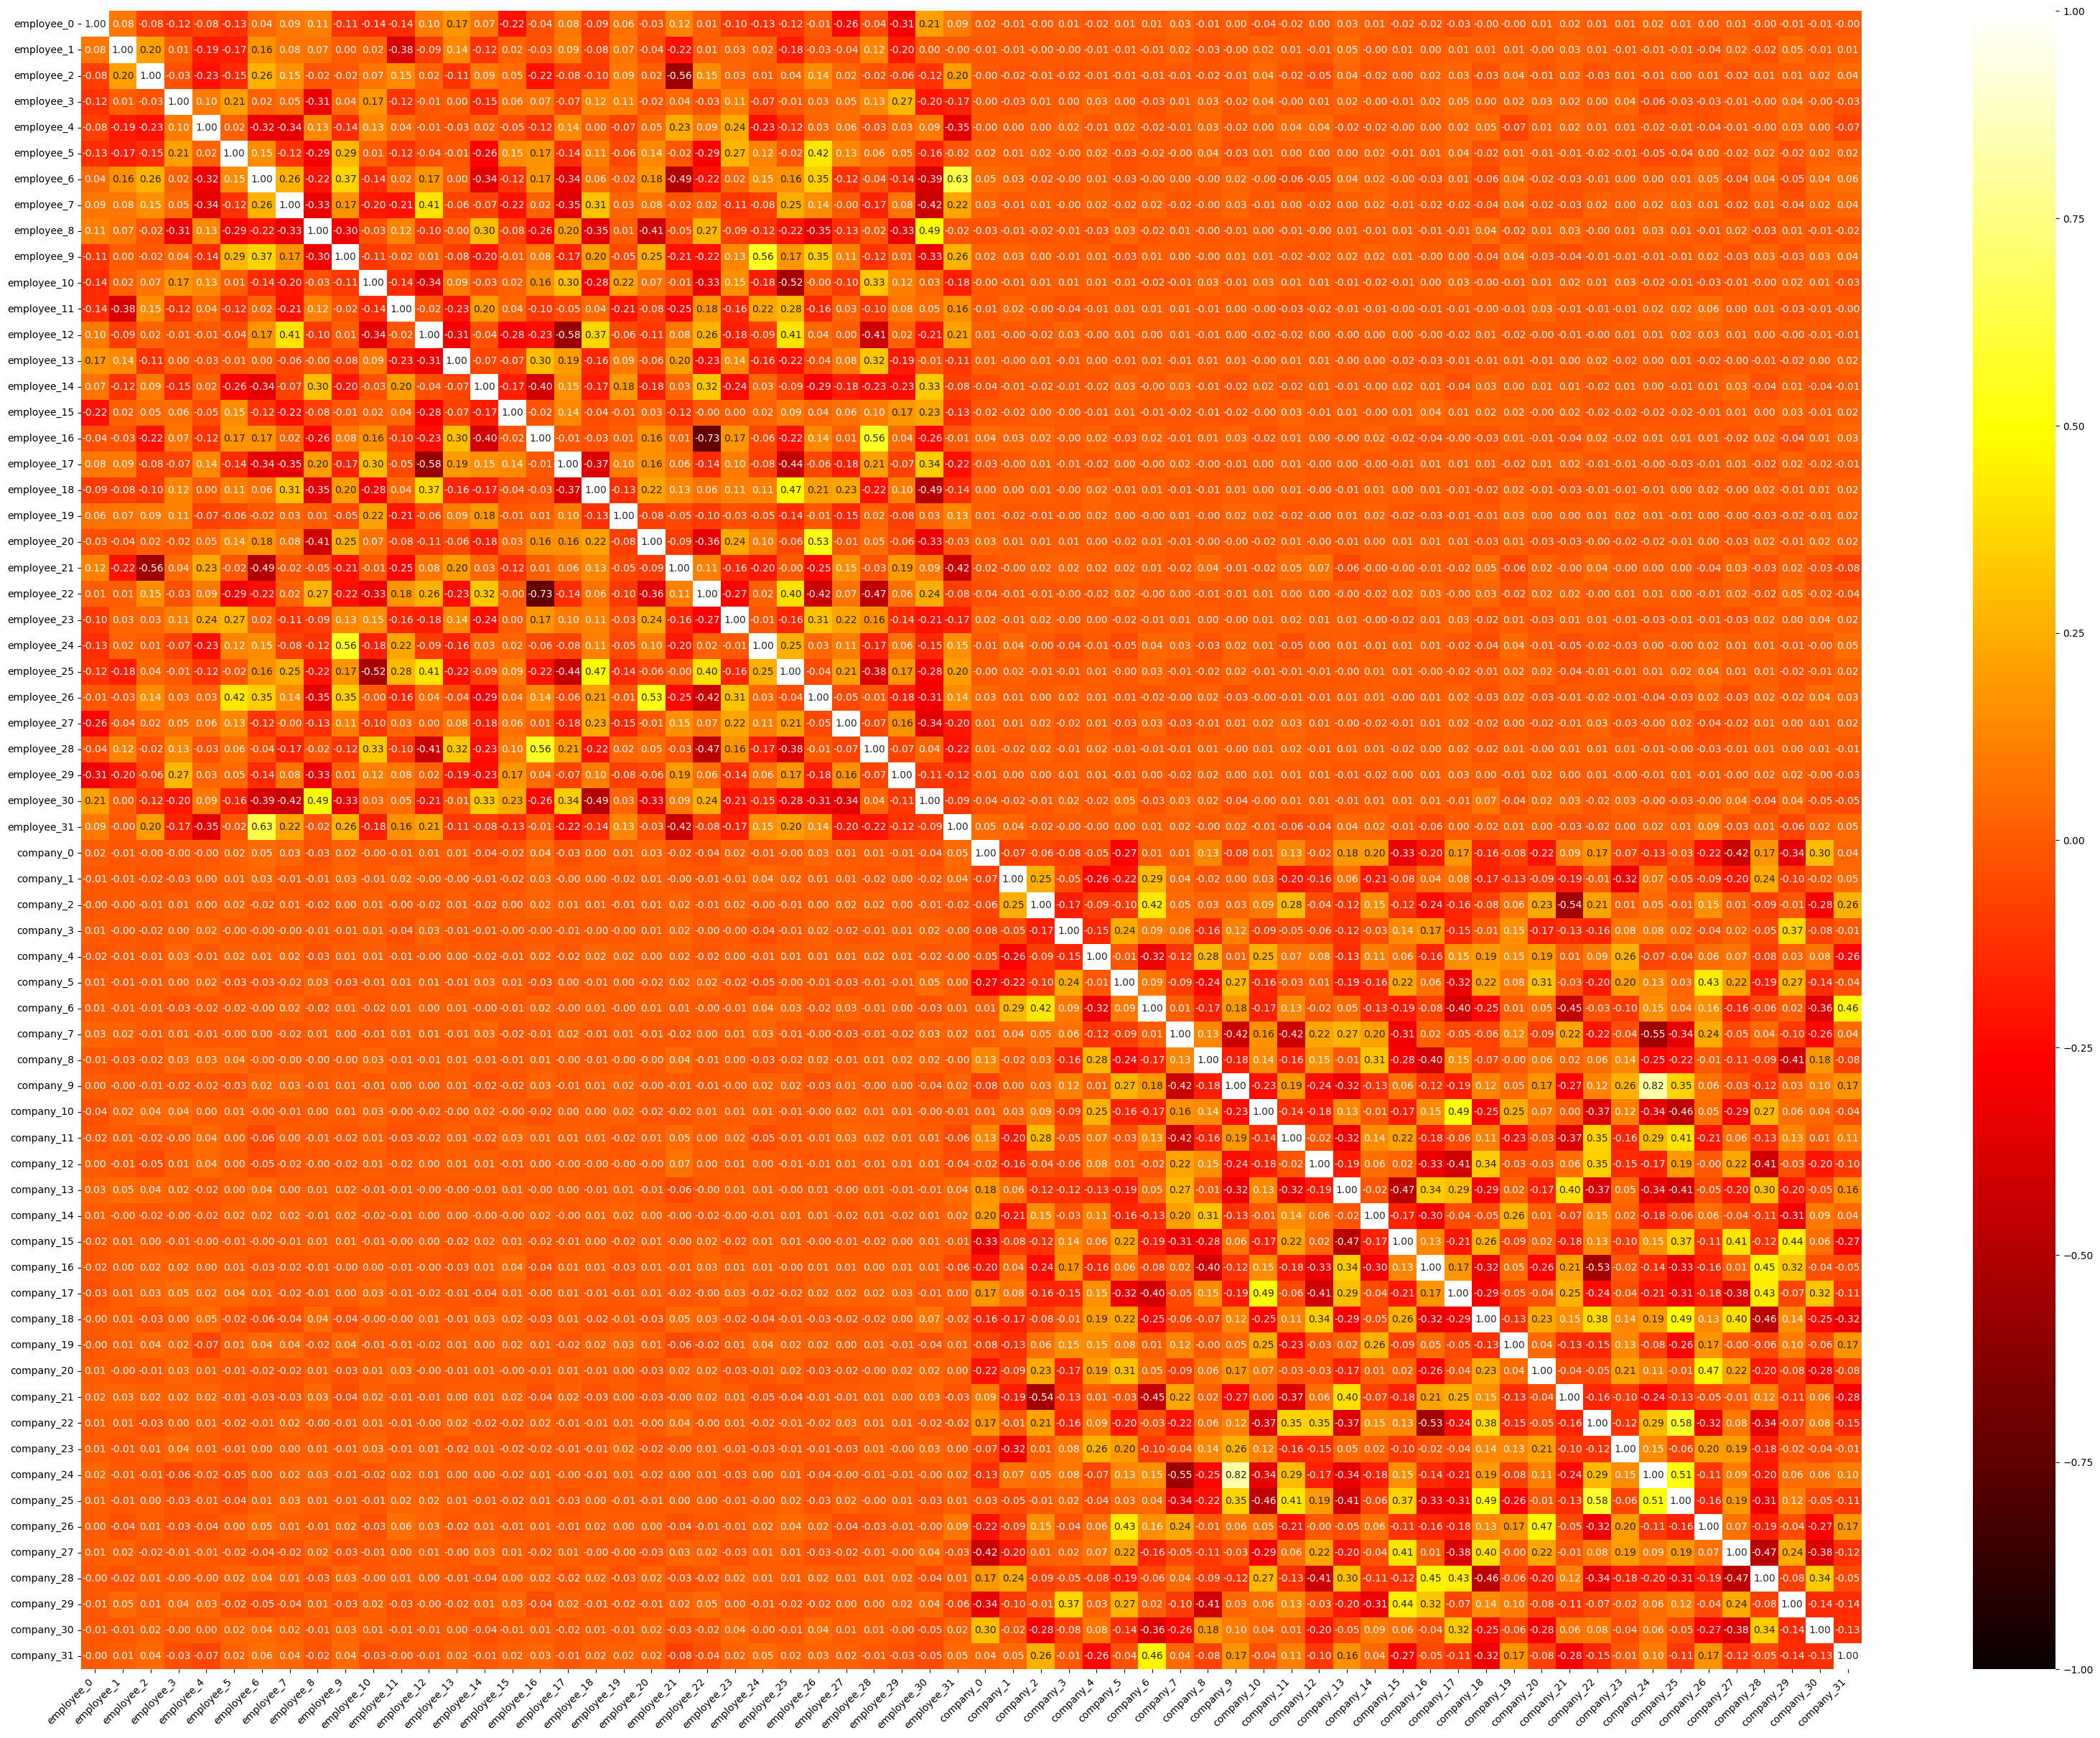

In [26]:
plot_correlation_matrix(data.drop(["position"], axis=1))

In [27]:
correlated_pairs = high_correlation_features(data.drop(["position"], axis=1))

In [28]:
correlated_pairs

,Feature 1,Feature 2,Correlation


No tenemos fuerte correlación entre las columnas.

Descomponemos en características y etiquetas:

In [29]:
# Prepare features and target variables
X = data.drop(["position"], axis=1)
y = data["position"].values

Codificamos las etiquetas en variables numéricas enteras:

In [30]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [31]:
dict_classes = dict(
    zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_)
)

In [32]:
dict_classes

{0: 'Assistant', 1: 'Director', 2: 'Executive', 3: 'Manager'}

Realizamos la particación entre entrenamiento y validación:

In [33]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, shuffle=True
)

# Display the shapes of the training and validation sets to confirm successful preprocessing
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((23418, 64), (5855, 64), (23418,), (5855,))

Calcular manualmente la ponderación de las clases a partir de las etiquetas puede resultar especialmente útil cuando se desea aplicar estrategias de equilibrio personalizadas o cuando se utilizan algoritmos de aprendizaje que no admiten de forma nativa la ponderación de clases. La idea es ponderar inversamente las clases en función de su frecuencia en el conjunto de datos. A continuación se explica cómo hacerlo:

* Cuente las ocurrencias de cada clase.
* Calcule el peso de cada clase. Un enfoque común es utilizar la inversa de la frecuencia de clase, posiblemente normalizada por el número total de muestras o el número de clases.


In [34]:
# Count the occurrences of each class
class_counts = Counter(y_train)

# Calculate the total number of samples
n_samples = len(y_train)

# Number of classes
n_classes = len(class_counts)

# Calculate the weight for each class
class_weights = {
    class_label: (n_samples / (n_classes * count))
    for class_label, count in class_counts.items()
}

In [35]:
class_weights

{0: 0.8138031693077564,
 2: 0.40977811996920277,
 1: 5.446046511627907,
 3: 6.791763341067285}

Este cálculo garantiza que las clases con frecuencias más bajas tengan un peso mayor, lo que las hace más importantes durante el entrenamiento de su modelo. La multiplicación por el número de clases garantiza que los pesos se normalicen en cierta medida, evitando que sean demasiado pequeños en conjuntos de datos con un gran número de muestras.

A continuación, puede pasar estos class_weights calculados al parámetro class_weight de los clasificadores en scikit-learn que lo soportan, como LogisticRegression, DecisionTreeClassifier, y otros.

Recuerde que la elección de la estrategia para calcular los pesos de clase puede depender de las características específicas de su conjunto de datos y de los objetivos de su tarea de modelado. El método anterior proporciona un enfoque equilibrado, pero puede necesitar ajustes en función de sus necesidades específicas o para hacer frente a desequilibrios extremos de clase.

### Clasificación

#### AdaBoost Clasification

El algoritmo AdaBoost, introducido por Freund y Schapire en 1997, revolucionó el modelado de conjuntos. Desde su creación, AdaBoost se ha convertido en una técnica ampliamente adoptada para abordar los retos de la clasificación binaria. Este potente algoritmo mejora la precisión de las predicciones transformando una multitud de aprendices débiles en aprendices fuertes y robustos.

El principio en el que se basan los algoritmos de boosting es que, en primer lugar, se construye un modelo sobre el conjunto de datos de entrenamiento y, a continuación, se construye un segundo modelo para rectificar los errores presentes en el primero. Este procedimiento continúa hasta que los errores se minimizan y el conjunto de datos se predice correctamente. Los algoritmos de refuerzo funcionan de forma similar: combinan varios modelos (aprendices débiles) para alcanzar el resultado final (aprendices fuertes).

In [36]:
# Initialize the AdaBoost classifier with a base estimator
ada_boost_cl = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(class_weight=class_weights),
    n_estimators=100,
    algorithm="SAMME",
    learning_rate=0.1,
)

In [37]:
ada_boost_cl.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(class_weight={0: 0.8138031693077564,
                                                                  1: 5.446046511627907,
                                                                  2: 0.40977811996920277,
                                                                  3: 6.791763341067285}),
                   learning_rate=0.1, n_estimators=100)

In [38]:
# Predict on the validation set
y_pred_ada = ada_boost_cl.predict(X_val)

In [39]:
print(classification_report(y_val, y_pred_ada))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60      1829
           1       0.32      0.33      0.32       281
           2       0.74      0.76      0.75      3506
           3       0.17      0.15      0.16       239

    accuracy                           0.66      5855
   macro avg       0.46      0.46      0.46      5855
weighted avg       0.66      0.66      0.66      5855



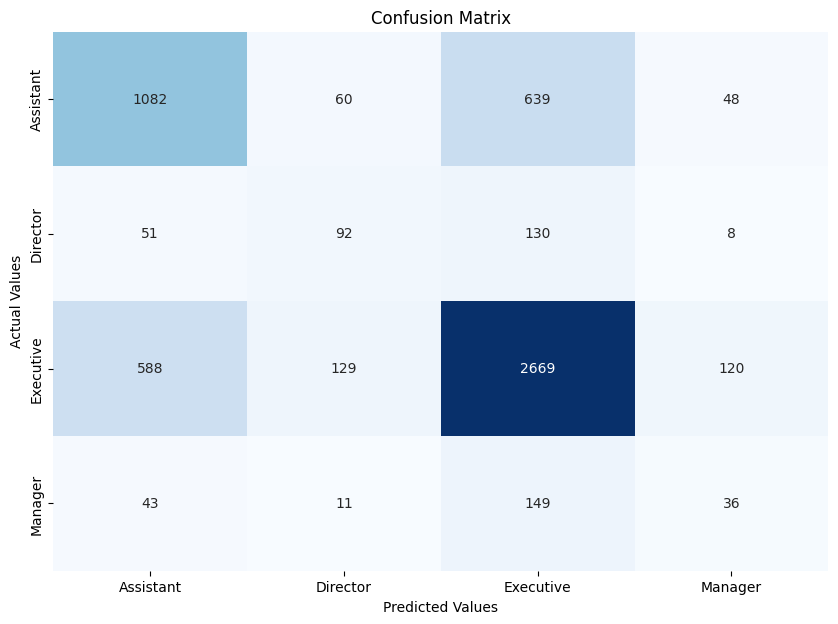

{0: 'Assistant', 1: 'Director', 2: 'Executive', 3: 'Manager'}
Los valores de las etiquetas de validación y_val son: 
{(2,): 3506, (0,): 1829, (1,): 281, (3,): 239}


In [40]:
plot_confusion_matrix(y_val, y_pred_ada, dict_classes)

#### Multinomial Logistic Regression

Un enfoque alternativo a la Regresion Logística consiste en cambiar el modelo de regresión logística para que admita directamente la predicción de múltiples etiquetas de clase. En concreto, para predecir la probabilidad de que un ejemplo de entrada pertenezca a cada etiqueta de clase conocida.

La distribución de probabilidad que define las probabilidades multiclase se denomina distribución de probabilidad multinomial. Un modelo de regresión logística adaptado para aprender y predecir una distribución de probabilidad multinomial se denomina regresión logística multinomial. De forma similar, podríamos referirnos a la regresión logística estándar o por defecto como Regresión Logística Binomial.

* Regresión logística binomial: Regresión logística estándar que predice una probabilidad binomial (es decir, para dos clases) para cada ejemplo de entrada.
* Regresión logística multinomial: Versión modificada de la regresión logística que predice una probabilidad multinomial (es decir, más de dos clases) para cada ejemplo de entrada.

In [41]:
# Initialize and train the Logistic Regression model with the 'multinomial' option
mnr_cl = LogisticRegression(
    multi_class="multinomial",
    solver="newton-cg",
    max_iter=100,
    class_weight=class_weights,
    verbose=True,
)
mnr_cl.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.8138031693077564, 1: 5.446046511627907,
                                 2: 0.40977811996920277, 3: 6.791763341067285},
                   multi_class='multinomial', solver='newton-cg', verbose=True)

In [42]:
# Predict on the validation set
y_pred_mnr = mnr_cl.predict(X_val)

In [43]:
print(classification_report(y_val, y_pred_mnr))

              precision    recall  f1-score   support

           0       0.44      0.40      0.42      1829
           1       0.09      0.41      0.15       281
           2       0.72      0.33      0.46      3506
           3       0.10      0.51      0.17       239

    accuracy                           0.37      5855
   macro avg       0.34      0.42      0.30      5855
weighted avg       0.58      0.37      0.42      5855



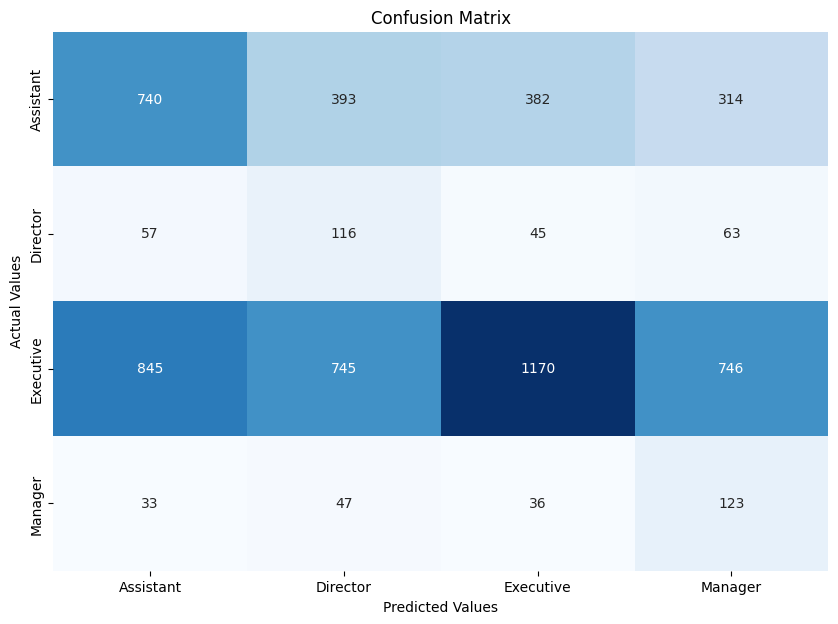

{0: 'Assistant', 1: 'Director', 2: 'Executive', 3: 'Manager'}
Los valores de las etiquetas de validación y_val son: 
{(2,): 3506, (0,): 1829, (1,): 281, (3,): 239}


In [44]:
plot_confusion_matrix(y_val, y_pred_mnr, dict_classes)

#### Random Forest Classifier

Un Bosque Aleatorio es como un equipo de toma de decisiones en grupo en el aprendizaje automático. Combina las opiniones de muchos "árboles" (modelos individuales) para hacer mejores predicciones, creando un modelo global más sólido y preciso.

La popularidad generalizada del algoritmo Random Forest se debe a su facilidad de uso y su adaptabilidad, que le permiten abordar eficazmente problemas tanto de clasificación como de regresión. La fuerza del algoritmo reside en su capacidad para manejar conjuntos de datos complejos y mitigar el sobreajuste, lo que lo convierte en una herramienta valiosa para diversas tareas de predicción en el aprendizaje automático.

Una de las características más importantes del algoritmo Random Forest es que puede manejar conjuntos de datos que contienen variables continuas, como en el caso de la regresión, y variables categóricas, como en el caso de la clasificación. Se comporta mejor en tareas de clasificación y regresión.

In [45]:
# Initialize and train the Random Forest classifier
rf_cl = RandomForestClassifier(
    n_estimators=100, 
    class_weight=class_weights, 
    verbose=True
)
rf_cl.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   10.6s


RandomForestClassifier(class_weight={0: 0.8138031693077564,
                                     1: 5.446046511627907,
                                     2: 0.40977811996920277,
                                     3: 6.791763341067285},
                       verbose=True)

In [46]:
# Predict on the validation set
y_pred_rf = rf_cl.predict(X_val)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


In [47]:
print(classification_report(y_val, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.54      0.67      1829
           1       0.87      0.25      0.39       281
           2       0.73      0.97      0.84      3506
           3       0.83      0.08      0.15       239

    accuracy                           0.76      5855
   macro avg       0.83      0.46      0.51      5855
weighted avg       0.79      0.76      0.73      5855



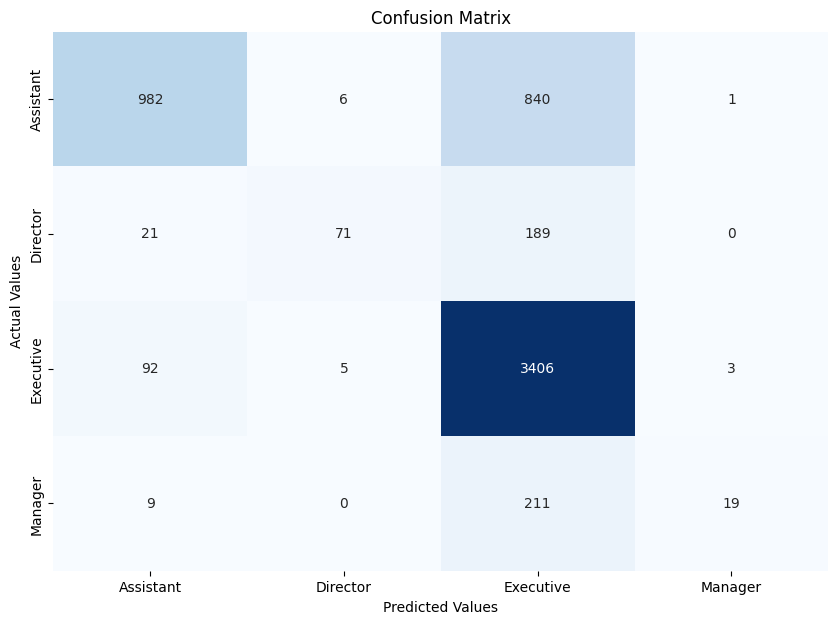

{0: 'Assistant', 1: 'Director', 2: 'Executive', 3: 'Manager'}
Los valores de las etiquetas de validación y_val son: 
{(2,): 3506, (0,): 1829, (1,): 281, (3,): 239}


In [48]:
plot_confusion_matrix(y_val, y_pred_rf, dict_classes)

### Referencias

* AdaBoost Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* AdaBoost Algorithm: Understand, Implement and Master AdaBoost: https://www.analyticsvidhya.com/blog/2021/09/adaboost-algorithm-a-complete-guide-for-beginners/

* Multinomial Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* Multinomial Logistic Regression With Python: https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

* Random Forest Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Understand Random Forest Algorithms With Examples (Updated 2024): https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/

![Lenguaje Matemático](./Images/Matematicas.png)

![Contacto](./Images/Contacto.png)